# 🏋 Section 1: Lab Exercise

## 📌 Objective

This lab will guide you through **advanced word cloud visualisation** techniques before preparing you for two assignments:

1.	Topic Modeling with Wikipedia Articles
2.	PCA for Digit Classification

By the end of this lab, you should have a **deeper understanding of NLP techniques** and **dimensionality reduction**, enabling you to work on the assignments effectively.

---

## 📋 **Tasks**: 

### 🔹 Task 1: Generate a Simple Word Cloud
Before diving into **advanced word clouds**, ensure you can generate a **basic word cloud** from a text corpus.

✅ Steps:

-	Load a text dataset (e.g., a Wikipedia article or news text).
-	Remove stopwords, punctuation, and unnecessary symbols.
-	Convert the text into a word cloud image.



In [2]:
!pip install wikipedia-api wordcloud nltk matplotlib

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.8.1-py3-none-any.whl size=15384 sha256=e9cc058bbdd4ecb08766cabfeeff758139a6d01397e4750cee450f9117b68024
  Stored in directory: /Users/dangkieu/Library/Caches/pip/wheels/3d/70/27/d8096daf5fb5b06a116583a7cc05da1225eb845ab44cc59f56
Successfully built wikipedia-api


In [3]:
import re
import wikipediaapi
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [4]:
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dangkieu/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
def preprocess_text(text):
    text = text.lower()  
    text = re.sub(r'[^\w\s]', '', text)  
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

In [8]:
sample_text = """
Natural language processing (NLP) is a subfield of artificial intelligence (AI) that focuses on the interaction between computers and humans using natural language.
"""

In [9]:
clean_text = preprocess_text(sample_text)

In [10]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(clean_text)


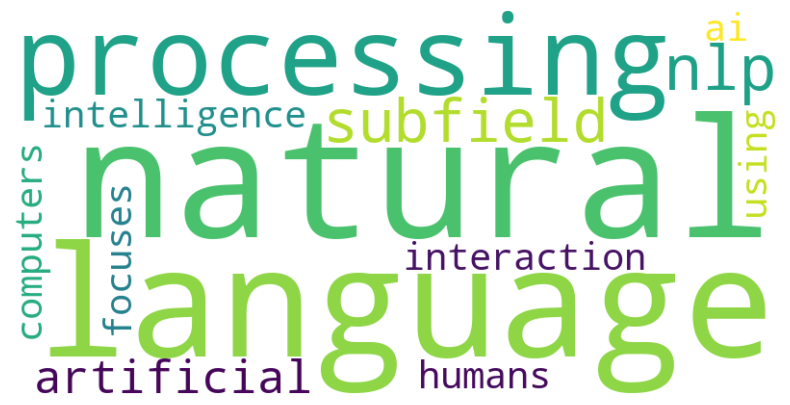

In [11]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  
plt.show()


### 🔹 Task 2: Advanced Word Cloud Visualisation

Now, extend your basic word cloud by adding **complex features**:

✅ Steps:

1.Shape-Based Word Clouds
  
- Use a custom mask to generate a word cloud in a specific shape (e.g., a map of Vietnam, a book, or a speech bubble).
  
2.Frequency vs. TF-IDF Word Clouds

- Compare a regular frequency-basebd word cloud vs. a TF-IDF weighted word cloud.
-	Explain how TF-IDF gives more importance to unique words instead of commonly used ones.

3.Multi-Coloured & Themed Word Clouds

-	Use colour gradients to differentiate positive vs. negative words.
-	Create different word clouds for different topics in the same dataset.

4.Bigrams & Phrase-Based Word Clouds

-	Extract bigrams (two-word phrases) to include words like "Vietnam War" instead of separate words "Vietnam" and "War".

5.Compare Word Clouds Before & After Preprocessing

-	Generate one word cloud before text cleaning (including stopwords, symbols).
-	Generate another word cloud after applying lemmatisation & stopword removal.
-	Compare the differences and discuss why preprocessing improves visualisation.



In [14]:
from PIL import Image

In [27]:
import numpy as np
mask = np.array(Image.open("vietnam.png"))

In [31]:
import requests

def fetch_wikipedia_summary(title):
    url = f"https://en.wikipedia.org/api/rest_v1/page/summary/{title}"
    headers = {
        "User-Agent": "MyWikiBot/1.0"  # Generic User-Agent (no email)
    }
    response = requests.get(url, headers=headers)
    
    if response.status_code == 200:
        return response.json().get("extract", "No summary available")
    else:
        return None

# vietnam_summary = fetch_wikipedia_summary("Vietnam")
vietnam_summary = [
    "Vietnam is a Southeast Asian country known for its history and beautiful landscapes.",
    "The Vietnam War was a conflict that shaped the country's history.",
    "Hanoi is the capital of Vietnam and is rich in culture and history.",
    "Vietnam's economy is growing rapidly, with tourism and agriculture playing key roles."
]
print(vietnam_summary)


['Vietnam is a Southeast Asian country known for its history and beautiful landscapes.', "The Vietnam War was a conflict that shaped the country's history.", 'Hanoi is the capital of Vietnam and is rich in culture and history.', "Vietnam's economy is growing rapidly, with tourism and agriculture playing key roles."]


In [34]:
clean_text = [preprocess_text(doc) for doc in vietnam_summary]

In [36]:
wordcloud = WordCloud(
    width=800, height=400,
    background_color="white",
    mask=mask, 
    contour_color="black",  
    contour_width=1
).generate(" ".join(clean_text))

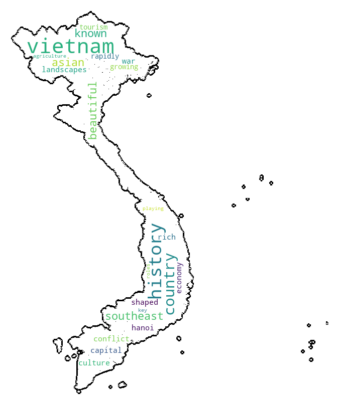

In [37]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [48]:
wordcloud_freq = WordCloud(width=800, height=400, background_color="white", mask=mask, contour_color="black",  # Optional: Outline color
        contour_width=1).generate(" ".join(vietnam_summary))

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(vietnam_summary)
tfidf_scores = dict(zip(vectorizer.get_feature_names_out(), tfidf_matrix.toarray().sum(axis=0)))

In [49]:
wordcloud_tfidf = WordCloud(width=800, height=400, background_color="white", mask=mask, contour_color="black",  # Optional: Outline color
        contour_width=1).generate_from_frequencies(tfidf_scores)

In [44]:
tfidf_scores

{'agriculture': np.float64(0.3148589132162344),
 'and': np.float64(0.8052003230935074),
 'asian': np.float64(0.3312031456484459),
 'beautiful': np.float64(0.3312031456484459),
 'capital': np.float64(0.3077199215857498),
 'conflict': np.float64(0.3373359142013519),
 'country': np.float64(0.5270838737093211),
 'culture': np.float64(0.3077199215857498),
 'economy': np.float64(0.3148589132162344),
 'for': np.float64(0.3312031456484459),
 'growing': np.float64(0.3148589132162344),
 'hanoi': np.float64(0.3077199215857498),
 'history': np.float64(0.6231334617934617),
 'in': np.float64(0.3077199215857498),
 'is': np.float64(0.8052003230935074),
 'its': np.float64(0.3312031456484459),
 'key': np.float64(0.3148589132162344),
 'known': np.float64(0.3312031456484459),
 'landscapes': np.float64(0.3312031456484459),
 'of': np.float64(0.3077199215857498),
 'playing': np.float64(0.3148589132162344),
 'rapidly': np.float64(0.3148589132162344),
 'rich': np.float64(0.3077199215857498),
 'roles': np.float

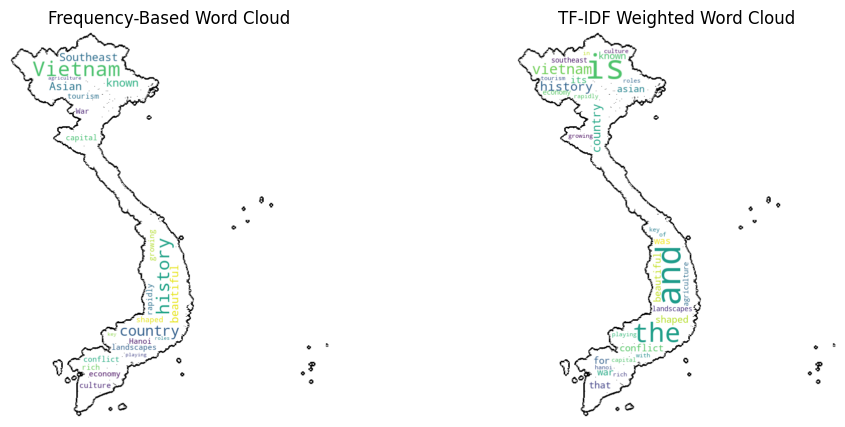

In [50]:
plt.figure(figsize=(12, 5))

# Frequency-based Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_freq, interpolation="bilinear")
plt.axis("off")
plt.title("Frequency-Based Word Cloud")

# TF-IDF Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_tfidf, interpolation="bilinear")
plt.axis("off")
plt.title("TF-IDF Weighted Word Cloud")

plt.show()

In [52]:
from nltk.corpus import stopwords, opinion_lexicon
nltk.download("stopwords")
nltk.download("opinion_lexicon")

stop_words = set(stopwords.words("english"))
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dangkieu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/dangkieu/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


In [53]:
text = """
Vietnam is a beautiful country with stunning landscapes and friendly people. 
However, some regions suffer from economic challenges and political issues. 
The tourism industry is thriving, but environmental concerns remain.
"""

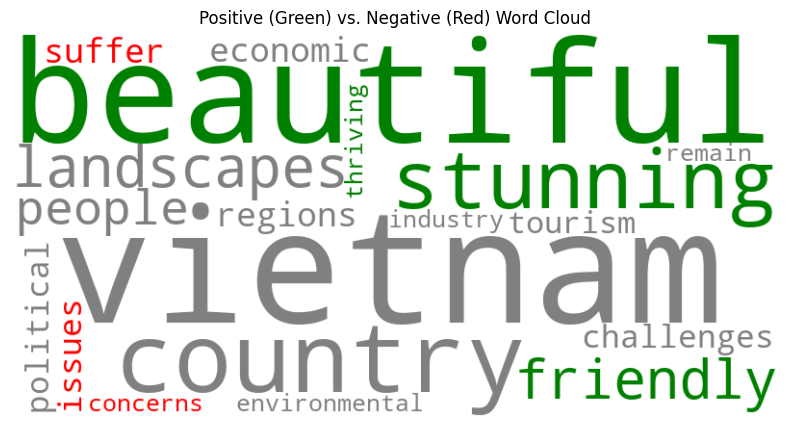

In [54]:
words = [word.lower() for word in text.split() if word.lower() not in stop_words]

def color_func(word, **kwargs):
    if word in positive_words:
        return "green"
    elif word in negative_words:
        return "red"
    return "gray"  

wordcloud = WordCloud(
    width=800, height=400, background_color="white",
    color_func=color_func
).generate(" ".join(words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Positive (Green) vs. Negative (Red) Word Cloud")
plt.show()

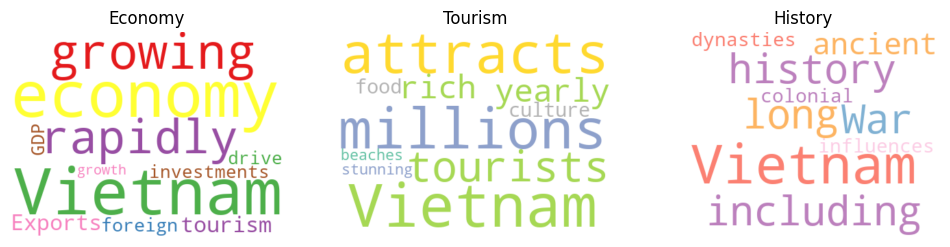

In [58]:
text_data = {
    "Economy": "Vietnam's economy is growing rapidly. Exports, tourism, and foreign investments drive GDP growth.",
    "Tourism": "Vietnam attracts millions of tourists yearly with its rich culture, food, and stunning beaches.",
    "History": "Vietnam has a long history, including the Vietnam War, ancient dynasties, and colonial influences."
}

plt.figure(figsize=(12, 4))

# Generate and display a word cloud for each topic
for i, (topic, text) in enumerate(text_data.items(), 1):
    wordcloud = WordCloud(width=400, height=300, background_color="white", colormap=f'Set{i}').generate(text)

    plt.subplot(1, 3, i)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(topic)

plt.show()

In [60]:
from collections import Counter

In [72]:
from nltk.util import ngrams



text = """
Vietnam is a Southeast Asian country known for its history, culture, and economic growth.
The Vietnam War significantly impacted the country's development.
Hanoi is the capital of Vietnam and a hub for culture and business.
Vietnam's economy is rapidly expanding, with tourism and agriculture playing key roles after Vietnam War.
"""

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return words

words = preprocess_text(text)
bigrams = list(ngrams(words, 2))
bigram_freq = Counter([" ".join(bigram) for bigram in bigrams])  


In [74]:
words

['vietnam',
 'southeast',
 'asian',
 'country',
 'known',
 'history',
 'culture',
 'economic',
 'growth',
 'vietnam',
 'war',
 'significantly',
 'impacted',
 'countrys',
 'development',
 'hanoi',
 'capital',
 'vietnam',
 'hub',
 'culture',
 'business',
 'vietnams',
 'economy',
 'rapidly',
 'expanding',
 'tourism',
 'agriculture',
 'playing',
 'key',
 'roles',
 'vietnam',
 'war']

In [75]:
bigrams

[('vietnam', 'southeast'),
 ('southeast', 'asian'),
 ('asian', 'country'),
 ('country', 'known'),
 ('known', 'history'),
 ('history', 'culture'),
 ('culture', 'economic'),
 ('economic', 'growth'),
 ('growth', 'vietnam'),
 ('vietnam', 'war'),
 ('war', 'significantly'),
 ('significantly', 'impacted'),
 ('impacted', 'countrys'),
 ('countrys', 'development'),
 ('development', 'hanoi'),
 ('hanoi', 'capital'),
 ('capital', 'vietnam'),
 ('vietnam', 'hub'),
 ('hub', 'culture'),
 ('culture', 'business'),
 ('business', 'vietnams'),
 ('vietnams', 'economy'),
 ('economy', 'rapidly'),
 ('rapidly', 'expanding'),
 ('expanding', 'tourism'),
 ('tourism', 'agriculture'),
 ('agriculture', 'playing'),
 ('playing', 'key'),
 ('key', 'roles'),
 ('roles', 'vietnam'),
 ('vietnam', 'war')]

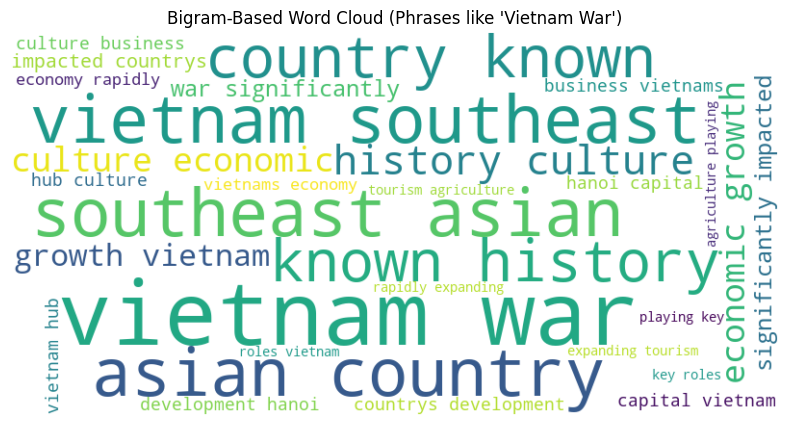

In [76]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(bigram_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Bigram-Based Word Cloud (Phrases like 'Vietnam War')")
plt.show()


### 🔹 Task 3: Understanding Topic Modeling & Dimensionality Reduction

Before working on the assignments, ensure you understand these **key concepts**:

📌 Topic Modeling (For Assignment 1)

- Topic modeling is used to discover hidden themes in large text data.
-	Latent Dirichlet Allocation (LDA) is a popular method that groups words into topics based on co-occurrence patterns.
-	pyLDAvis helps visualise the topic distribution and important words per topic.

✅ Preparation Task:

-	Research how LDA works and how topics are extracted from documents.
-	Understand how the relevance slider (λ) in pyLDAvis helps refine word selection for each topic.

---

📌 Dimensionality Reduction (For Assignment 2)

-	High-dimensional data (e.g., images or text embeddings) is difficult to visualise.
-	Principal Component Analysis (PCA) helps reduce dimensions while keeping important information.
- In the Digits dataset, PCA can transform 64-dimensional images into a 2D or 3D representation for easier classification.

✅ Preparation Task:

-	Research how PCA works and why it is useful for high-dimensional data.
-	Understand how explained variance helps determine how much information is retained after reducing dimensions.
-	Read about common misclassifications (e.g., why people confuse 1 and 7 in handwriting recognition).

---
